# 분류 - 타이타닉 데이터

In [366]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 데이터 로드 및 확인

In [367]:
train = pd.read_csv('C:/Users/sjy54/Desktop/SonStory/산공/3-1/산업공학실험/과제/13주차/13주차/타이타닉트레인.csv')
test = pd.read_csv('C:/Users/sjy54/Desktop/SonStory/산공/3-1/산업공학실험/과제/13주차/13주차/타이타닉테스트.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- passengerid : passenger 번호
- survived : 생존 여부(생존은 1, 아닌 경우 0)
- pclass : passenger class(승객 등급)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동승한 형제 또는 배우자 수
- parch : 동승한 부모 또는 자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 요금
- embarked : 승선항(C=쉘 부르크, Q=퀸즈타운, S=사우스햄튼)

In [368]:
train.shape

(891, 12)

891개의 행과 12개의 칼럼

In [369]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


카테고리형 데이터 및 결측치 존재 확인

## 데이터 전처리

## 피처 삭제

In [370]:
train = train.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)
test = test.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)

print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


분석에 활용할 수 없을 것으로 보이거나 결측치가 많은 피처 제거(4개)

### 결측치

In [371]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [372]:
# age 피처 결측치는 평균값으로 대체
age_mean = train['Age'].mean()
train['Age'].fillna(age_mean, inplace=True)
test['Age'].fillna(age_mean, inplace=True)

age 피처의 결측치는 평균값으로 대체 -> 테스트 데이터도 동일

In [373]:
# Embarked 피처 결측치는 최빈값으로 대체
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [374]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

embarked 중 가장 많은 S로 결측치 대체

In [375]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

결측치 모두 제거

In [376]:
fare_mean = train['Fare'].mean()
test['Fare'].fillna(fare_mean, inplace=True)

In [377]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


테스트 데이터의 결측치까지 모두 대체 완료

## 카테고리형 피처

In [378]:
train['Pclass_cut'] = 0
train['Pclass_cut'] = pd.cut(train['Pclass'], bins=[0, 1, 2, 3], labels=['1','2','3'])

test['Pclass_cut'] = 0
test['Pclass_cut'] = pd.cut(test['Pclass'], bins=[0, 1, 2, 3], labels=['1','2','3'])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_cut
0,0,3,male,22.0,1,0,7.2500,S,3
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,3
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,3


Pclass의 경우 범주형 데이터지만 수치형으로 표현되어 있어 새롭게 범주형 피처를 만들고 원-핫 인코딩 수행

In [379]:
train = pd.get_dummies(train)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_cut_1,Pclass_cut_2,Pclass_cut_3
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [380]:
train.shape

(891, 14)

In [381]:
test = pd.get_dummies(test)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_cut_1,Pclass_cut_2,Pclass_cut_3
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [382]:
test.shape

(418, 13)

train, test 데이터 원-핫 인코딩 수행(sex, embarked 피처)

In [383]:
# Pclass 피처 삭제
train = train.drop('Pclass', axis=1)
test = test.drop('Pclass', axis=1)

# 피처 이름 변경
train.rename(columns = {'Pclass_cut_1' : 'Pclass_1',
                        'Pclass_cut_2' : 'Pclass_2',
                        'Pclass_cut_3' : 'Pclass_3'},inplace=True)

test.rename(columns = {'Pclass_cut_1' : 'Pclass_1',
                       'Pclass_cut_2' : 'Pclass_2',
                       'Pclass_cut_3' : 'Pclass_3'},inplace=True)

In [384]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


## 피처 스케일링

In [385]:
# scaler 객체 생성
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train[['Age', 'Fare']]) 
test_scaled = scaler.transform(test[['Age', 'Fare']])

train[['Age', 'Fare']] = train_scaled
test[['Age', 'Fare']] = test_scaled

train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.592481,1,0,-0.502445,0,1,0,0,1,0,0,1
1,1,0.638789,1,0,0.786845,1,0,1,0,0,1,0,0
2,1,-0.284663,0,0,-0.488854,1,0,0,0,1,0,0,1
3,1,0.407926,1,0,0.420730,1,0,0,0,1,1,0,0
4,0,0.407926,0,0,-0.486337,0,1,0,0,1,0,0,1


Age와 Fare 피쳐에 대해서만 스케일링 수행(다른 피처의 경우 모두 0또는 1의 값)

## 모델 적용

In [394]:
# 모델 학습 데이터 설정
train_input = train.drop('Survived', axis=1)
train_target = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(train_input, train_target,
                                                   test_size=0.2,
                                                   random_state = 42)

### DecisionTree

In [406]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7932960893854749


### SVM

In [409]:
import sklearn.svm as svm

model = svm.SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7821229050279329


### K-NN

In [411]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.8156424581005587


## 분류 결론
- 데이터 전처리
    - 분석에 활용할 수 없는 피쳐 삭제
    - 결측치 대체(평균값, 최빈값)
    - 피처 스케일링
    - 범주형 피처 원-핫 인코딩
- 모델 학습
    - Decision Tree score : 0.7933
    - Svm score : 0.7821
    - K-NN score : 0.8156
    - K-NN 모델의 Score가 가장 높게 나옴

# 회귀 - 보스턴 집값 예측

## 데이터 로드 및 데이터 확인

In [292]:
df = pd.read_csv('C:/Users/sjy54/Desktop/SonStory/산공/3-1/산업공학실험/과제/13주차/13주차/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값) - 종속변수

In [293]:
df.shape

(506, 15)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


- 문자형 데이터가 없음(전부 실수 or 정수형)
- NULL값 없음
- 수치형 피처이지만 범주형 피처 -> CHAS, RM, RAD, CAT.MEDV

## 데이터 전처리

### RM 피처

RM 피처의 경우 거주할 수 있는 방의 개수인데, 실수형인게 의문

In [295]:
df['RM'].value_counts()

5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: RM, Length: 446, dtype: int64

In [296]:
df['RM'] = df['RM'].apply(np.int64)
df['RM'].value_counts()

6    269
5    158
7     51
8     13
4     13
3      2
Name: RM, dtype: int64

RM 피쳐 정수로 변경

## 상관계수 확인
피처가 모두 문자형이 아니기 때문에 상관계수의 확인이 가능

<AxesSubplot:>

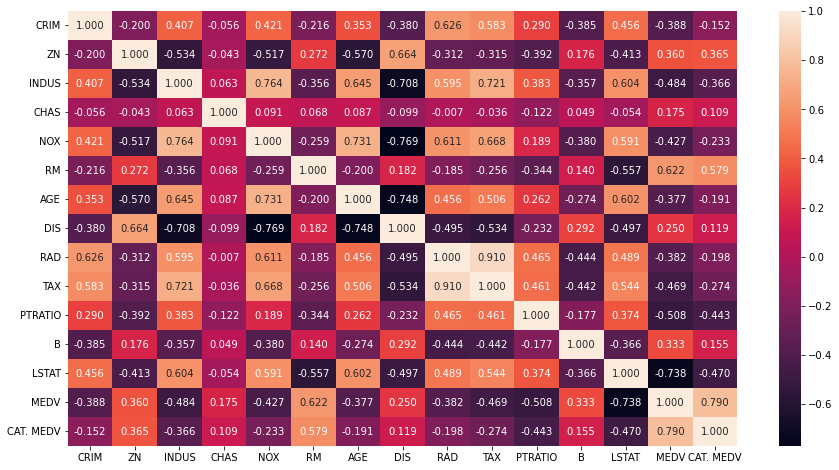

In [297]:
corr = df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot=True, fmt='.3f')

In [298]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.216039,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.271762,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.356320,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.068294,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.259478,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.216039,0.271762,-0.356320,0.068294,-0.259478,1.000000,-0.200498,0.182281,-0.184688,-0.255715,-0.344208,0.139852,-0.557114,0.621692,0.579123
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.200498,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.182281,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.184688,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.255715,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [299]:
df.drop('CHAS', axis=1, inplace=True)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0.538,6,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.458,6,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.458,7,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0.573,6,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.573,6,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0.573,6,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


MEDV 피처와 상관계수가 낮은 CHAS 피처 삭제

In [300]:
df.drop('CAT. MEDV', axis=1, inplace=True)

CAT. MEDV 또한 상관계수는 높지만 피처 의미를 알 수 없어 삭제

In [301]:
df.drop('DIS', axis=1, inplace=True)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6,65.2,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6,78.9,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7,61.1,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6,45.8,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7,54.2,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6,69.1,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6,76.7,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6,91.0,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6,89.3,1,273,21.0,393.45,6.48,22.0


Dis 피처 또한 상관계수가 낮아 삭제

## 이상치 확인

In [302]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,5.776680,68.574901,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.778123,28.148861,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.000000,2.900000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.000000,45.025000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.000000,77.500000,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.000000,94.075000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.000000,100.000000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


이상치는 딱히 없어보임

## 원-핫 인코딩

수치형 피처이지만 데이터는 범주형을 나타내는 피처 -> RM, RAD

In [304]:
# RM 피처 범주화
df['RM_cut'] = 0
df['RM_cut'] = pd.cut(df['RM'], bins=[0,3,4,5,6,7,8], labels=['3','4','5','6','7','8'])
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_cut
0,0.00632,18.0,2.31,0.538,6,65.2,1,296,15.3,396.90,4.98,24.0,6
1,0.02731,0.0,7.07,0.469,6,78.9,2,242,17.8,396.90,9.14,21.6,6
2,0.02729,0.0,7.07,0.469,7,61.1,2,242,17.8,392.83,4.03,34.7,7
3,0.03237,0.0,2.18,0.458,6,45.8,3,222,18.7,394.63,2.94,33.4,6
4,0.06905,0.0,2.18,0.458,7,54.2,3,222,18.7,396.90,5.33,36.2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6,69.1,1,273,21.0,391.99,9.67,22.4,6
502,0.04527,0.0,11.93,0.573,6,76.7,1,273,21.0,396.90,9.08,20.6,6
503,0.06076,0.0,11.93,0.573,6,91.0,1,273,21.0,396.90,5.64,23.9,6
504,0.10959,0.0,11.93,0.573,6,89.3,1,273,21.0,393.45,6.48,22.0,6


In [306]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [307]:
# RAD 피처 범주화
df['RAD_cut'] = 0
df['RAD_cut'] = pd.cut(df['RAD'], bins=[0,1,2,3,4,5,6,7,8,24], labels=['1','2','3','4','5','6','7','8','24'])
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_cut,RAD_cut
0,0.00632,18.0,2.31,0.538,6,65.2,1,296,15.3,396.90,4.98,24.0,6,1
1,0.02731,0.0,7.07,0.469,6,78.9,2,242,17.8,396.90,9.14,21.6,6,2
2,0.02729,0.0,7.07,0.469,7,61.1,2,242,17.8,392.83,4.03,34.7,7,2
3,0.03237,0.0,2.18,0.458,6,45.8,3,222,18.7,394.63,2.94,33.4,6,3
4,0.06905,0.0,2.18,0.458,7,54.2,3,222,18.7,396.90,5.33,36.2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6,69.1,1,273,21.0,391.99,9.67,22.4,6,1
502,0.04527,0.0,11.93,0.573,6,76.7,1,273,21.0,396.90,9.08,20.6,6,1
503,0.06076,0.0,11.93,0.573,6,91.0,1,273,21.0,396.90,5.64,23.9,6,1
504,0.10959,0.0,11.93,0.573,6,89.3,1,273,21.0,393.45,6.48,22.0,6,1


In [308]:
# 원-핫 인코딩 수행
df = pd.get_dummies(df)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,...,RM_cut_8,RAD_cut_1,RAD_cut_2,RAD_cut_3,RAD_cut_4,RAD_cut_5,RAD_cut_6,RAD_cut_7,RAD_cut_8,RAD_cut_24
0,0.00632,18.0,2.31,0.538,6,65.2,1,296,15.3,396.90,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6,78.9,2,242,17.8,396.90,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7,61.1,2,242,17.8,392.83,...,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6,45.8,3,222,18.7,394.63,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7,54.2,3,222,18.7,396.90,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6,69.1,1,273,21.0,391.99,...,0,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.573,6,76.7,1,273,21.0,396.90,...,0,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.573,6,91.0,1,273,21.0,396.90,...,0,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.573,6,89.3,1,273,21.0,393.45,...,0,1,0,0,0,0,0,0,0,0


In [311]:
# RM, RAD 피처 삭제
df = df.drop(['RM', 'RAD'], axis=1)

# 피처 이름 변경
df.rename(columns = {'RM_cut_3' : 'RM_3',
                    'RM_cut_4' : 'RM_4',
                    'RM_cut_5' : 'RM_5',
                    'RM_cut_6' : 'RM_6',
                    'RM_cut_7' : 'RM_7',
                    'RM_cut_8' : 'RM_8',},inplace=True)

df.rename(columns = {'RAD_cut_1' : 'RM_1',
                    'RAD_cut_2' : 'RM_2',
                    'RAD_cut_3' : 'RM_3',
                    'RAD_cut_4' : 'RM_4',
                    'RAD_cut_5' : 'RM_5',
                    'RAD_cut_6' : 'RM_6',
                    'RAD_cut_7' : 'RM_7',
                    'RAD_cut_8' : 'RM_8',
                    'RAD_cut_24' : 'RM_24',},inplace=True)

df

,CRIM,ZN,INDUS,NOX,AGE,TAX,PTRATIO,B,LSTAT,MEDV,...,RM_8,RM_1,RM_2,RM_3,RM_4,RM_5,RM_6,RM_7,RM_8,RM_24
0,0.00632,18.0,2.31,0.538,65.2,296,15.3,396.90,4.98,24.0,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,78.9,242,17.8,396.90,9.14,21.6,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,61.1,242,17.8,392.83,4.03,34.7,...,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,45.8,222,18.7,394.63,2.94,33.4,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,54.2,222,18.7,396.90,5.33,36.2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,69.1,273,21.0,391.99,9.67,22.4,...,0,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.573,76.7,273,21.0,396.90,9.08,20.6,...,0,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.573,91.0,273,21.0,396.90,5.64,23.9,...,0,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.573,89.3,273,21.0,393.45,6.48,22.0,...,0,1,0,0,0,0,0,0,0,0


In [312]:
df.shape

(506, 25)

## 피처 스케일링

In [335]:
# scaler 객체 생성
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']]) 
df[['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']] = df_scaled

df.head()

,CRIM,ZN,INDUS,NOX,AGE,TAX,PTRATIO,B,LSTAT,MEDV,...,RM_8,RM_1,RM_2,RM_3,RM_4,RM_5,RM_6,RM_7,RM_8,RM_24
0,-0.419782,0.284830,-1.287909,-0.144217,-0.120013,-0.666608,-1.459000,0.441052,-1.075562,24.0,...,0,1,0,0,0,0,0,0,0,0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.367166,-0.987329,-0.303094,0.441052,-0.492439,21.6,...,0,0,1,0,0,0,0,0,0,0
2,-0.417342,-0.487722,-0.593381,-0.740262,-0.265812,-0.987329,-0.303094,0.396427,-1.208727,34.7,...,0,0,1,0,0,0,0,0,0,0
3,-0.416750,-0.487722,-1.306878,-0.835284,-0.809889,-1.106115,0.113032,0.416163,-1.361517,33.4,...,0,0,0,1,0,0,0,0,0,0
4,-0.412482,-0.487722,-1.306878,-0.835284,-0.511180,-1.106115,0.113032,0.441052,-1.026501,36.2,...,0,0,0,1,0,0,0,0,0,0


RM, RAD 피처 제외 스케일링 수행

## 모델 적용

In [351]:
# 데이터 구성
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

## LinearRegression

In [352]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
print(RMSE)

4.362163500562774


## 회귀 결론
- 피쳐 전처리
    - RM 피처의 전처리(실수형 데이터 -> 정수형으로 변경)
    - 타겟 피쳐인 MEDV 피처와의 상관계수를 확인해 상관계수가 낮은 피쳐 삭제
    - 수치형 피쳐지만 범주형 데이터를 나타내는 피쳐에 대한 원-핫 인코딩 수행
    - 수치형 피쳐들에 대한 스케일링 수행
- 모델 학습 및 예측 : LInearRegression 모델에 대한 학습 결과 RMSE가 4.36 정도로 나타남